# HW03: Distance and Topic Model

Remember that these homework work as a completion grade. **You can skip one section without losing credit.**

## Load and Pre-process Text

In [219]:
#Import the AG news dataset (same as hw01)
#Download them from here 
!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

import pandas as pd
import nltk
df = pd.read_csv('train.csv')

df.columns = ["label", "title", "lead"]
label_map = {1:"world", 2:"sport", 3:"business", 4:"sci/tech"}
def replace_label(x):
	return label_map[x]
df["label"] = df["label"].apply(replace_label) 
df["text"] = df["title"] + " " + df["lead"]
df.head()

--2023-03-15 11:38:09--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: 'train.csv'

train.csv           100%[===================>]  28.10M   369KB/s    in 72s     

2023-03-15 11:39:24 (397 KB/s) - 'train.csv' saved [29470338/29470338]



,label,title,lead,text
0,business,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...
1,business,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...
2,business,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...
3,business,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new..."
4,business,"Stocks End Up, But Near Year Lows (Reuters)",Reuters - Stocks ended slightly higher on Frid...,"Stocks End Up, But Near Year Lows (Reuters) Re..."


In [220]:
import spacy
dfs = df.sample(200)
nlp = spacy.load('en_core_web_sm')

txt ="Hi my name is Sören 23. I lived in Florida. My pet is called Sven, and it's a dog.&?"

def spacy_cleanup(txt, lowercase):
    l = []
    if lowercase:
        txt = txt.lower()
    doc = nlp(txt)
    for t in doc:
        if not (t.is_stop or t.is_punct or t.is_digit):
            l.append(t.lemma_)
    return " ".join(l)

spacy_cleanup(txt, True)

##TODO pre-process text as you did in HW02
dfs['pre_processed'] = dfs['text'].apply(lambda x: spacy_cleanup(x, True))
dfs.head()

,label,title,lead,text,pre_processed
84937,sport,"Bay, Crosby Honored as Top MLB Rookies (Reuters)",Reuters - Outfielder Jason Bay became the\firs...,"Bay, Crosby Honored as Top MLB Rookies (Reuter...",bay crosby honor mlb rookie reuter reuters out...
115174,world,Filipinos mourn the death of movie legend,"The actor, who nearly unseated Gloria Arroyo i...",Filipinos mourn the death of movie legend The ...,filipinos mourn death movie legend actor nearl...
93000,sci/tech,Hollywood Writer Sues Microsoft Over Yoga Game,LOS ANGELES (Reuters) - Academy Award-winning...,Hollywood Writer Sues Microsoft Over Yoga Game...,hollywood writer sue microsoft yoga game los...
70160,sport,Bumbling Ramirez Gives (And Gives Away) (AP),AP - He slips. He trips. He lets it rip. That'...,Bumbling Ramirez Gives (And Gives Away) (AP) A...,bumble ramirez give give away ap ap slip trip ...
13862,world,Iraqi Leaders Meet in Peace Effort,"BAGHDAD, Iraq - The U.S. military and Iraqi Sh...","Iraqi Leaders Meet in Peace Effort BAGHDAD, Ir...",iraqi leader meet peace effort baghdad iraq u....


In [221]:
from sklearn.feature_extraction.text import TfidfVectorizer

##TODO vectorize the pre-processed text using TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=0.01, 
                        max_df=0.9,  
                        max_features=1000,
                        stop_words='english',
                        use_idf=True, # the new piece
                        ngram_range=(1,2))

X = vectorizer.fit_transform(dfs['pre_processed'])
print(X.shape)
words = vectorizer.get_feature_names_out()

df_tfidf = pd.DataFrame(X.toarray(),columns=words)
df_t = df_tfidf.T.sum(axis=1)
df_t.head(20)

#will use df_tfidf going forward

(200, 809)


000           1.474474
10            0.373267
18th          0.601122
36            1.355749
39            6.135369
39 moon       0.441812
39 nextel     0.425069
39 old        0.436089
400           0.970864
able          0.351213
abuse         0.821106
accelerate    0.449055
access        0.694064
accord        0.711393
actor         1.015112
add           1.199630
advance       0.476190
aerospace     0.508108
afp           1.626804
afp afp       0.724136
dtype: float64

## Cosine Similarity and PCA

In [222]:
from sklearn.metrics.pairwise import cosine_similarity
##TODO compute the cosine similarity for the first 200 snippets and for the first snippet, 

cos_sim = cosine_similarity(X,X)
print(cos_sim.shape)
#show the three most similar snippets and their respective cosine similarity scores

cos_sim

(200, 200)


array([[1.        , 0.        , 0.06661973, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.04022059],
       [0.06661973, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.04022059, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [223]:
import itertools

dict_1 = {}
for i in range(cos_sim.shape[0]):
    for j in range(cos_sim.shape[0]):
        #creating a dict entries
        dict_1[cos_sim[i,j]] = [i,j]

dict_1 = dict(sorted(dict_1.items(), reverse=True))

dict(itertools.islice(dict_1.items(), 10))
#should appear 200 entries with 1 and then the most similair... Probably there exist a better implementation of
#retreiving the most similair ones...

{1.0000000000000007: [186, 186],
 1.0000000000000004: [199, 199],
 1.0000000000000002: [197, 197],
 1.0: [198, 198],
 0.9999999999999999: [156, 156],
 0.9999999999999998: [120, 120],
 0.9999999999999996: [58, 58],
 0.7077516089436625: [139, 48],
 0.6526753602685806: [183, 24],
 0.612212929944322: [105, 72]}

In [224]:
from sklearn.decomposition import PCA

##TODO reduce the vectorized data using PCA
pca = PCA(n_components=3,svd_solver='randomized')
#sparse
X_pca = pca.fit_transform(X.toarray())
print(X_pca.shape)
##TODO compute again cosine similarity with the reduced version for the first 200 snippets
cos_sim_pca = cosine_similarity(X_pca,X_pca)
print(cos_sim_pca.shape)
##TODO for the first snippet, show again its three most similar snippets
dict_2 = {}
for i in range(cos_sim_pca.shape[0]):
    for j in range(cos_sim_pca.shape[0]):
        #creating a dict entries
        dict_2[cos_sim_pca[i,j]] = [i,j]

dict_2 = dict(sorted(dict_2.items(), reverse=True))

dict(itertools.islice(dict_2.items(), 10))

(200, 3)
(200, 200)


{1.0000000000000004: [19, 19],
 1.0000000000000002: [195, 195],
 1.0: [198, 198],
 0.9999999999999999: [199, 199],
 0.9999999999999998: [192, 192],
 0.9999959499681229: [98, 2],
 0.999979589515794: [138, 69],
 0.9999761146510632: [197, 3],
 0.9999245340338379: [61, 13],
 0.999900449675739: [183, 112]}

In [225]:
cos_sim

array([[1.        , 0.        , 0.06661973, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
        0.04022059],
       [0.06661973, 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.04022059, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [226]:
cos_sim_pca

array([[ 1.        , -0.25883102,  0.89218303, ..., -0.52949021,
         0.61401754, -0.23147628],
       [-0.25883102,  1.        ,  0.07342431, ..., -0.53014612,
         0.54179959,  0.99560753],
       [ 0.89218303,  0.07342431,  1.        , ..., -0.53066892,
         0.67575548,  0.06970876],
       ...,
       [-0.52949021, -0.53014612, -0.53066892, ...,  1.        ,
        -0.97935529, -0.59067974],
       [ 0.61401754,  0.54179959,  0.67575548, ..., -0.97935529,
         1.        ,  0.58847957],
       [-0.23147628,  0.99560753,  0.06970876, ..., -0.59067974,
         0.58847957,  1.        ]])

Compare the cosine similarity before and after PCA reduction. Did the results change? 

#Answers: Yes, the similairity score changed...

## Clustering

In [227]:
# !pip install scikit-learn-extra
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

##TODO create the clusters found with k-medoids clustering nd 5 clusters
kmedoids = KMedoids(n_clusters=5, random_state=44)
kmed_clusters = kmedoids.fit_predict(X.toarray())
##TODO create the clusters found with k-means clustering nd 5 clusters
kmeans = KMeans(n_clusters=5, random_state=44)
kmeans_clusters = kmeans.fit_predict(X.toarray())

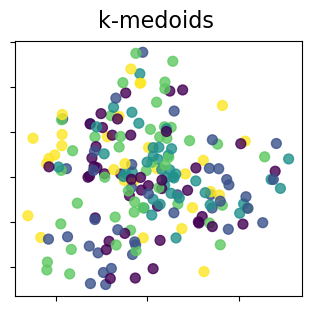

In [228]:
##TODO visualize the k-medoids clustering results through Isomap (first reduce the dimensionality to 2 using Isomap,
#then use scatter plot (plt.scatter()) to visualize)
import matplotlib.pyplot as plt
from matplotlib import ticker

def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    add_2d_scatter(ax, points, points_color)
    plt.show()

def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(ticker.NullFormatter())
    ax.yaxis.set_major_formatter(ticker.NullFormatter())

#isomap
from sklearn.manifold import Isomap
embedding = Isomap(n_components=2)
points = embedding.fit_transform(X.toarray())

plot_2d(points, kmed_clusters, "k-medoids")

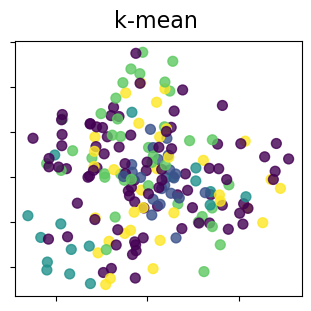

In [229]:
##TODO similarly, visualize the k-means results
plot_2d(points, kmeans_clusters, "k-mean")

## Topic Modeling: LDA

For this part you will need to use LDA Mallet. If you cannot have Mallet run, you can use the simple LDA algorithm 

In [230]:
from gensim.corpora import Dictionary
#from gensim.models.wrappers import LdaMallet
#outdated
from gensim.models.coherencemodel import CoherenceModel

##TODO create a dictionary with the pre-processed tokenized text and filter it according to
#frequencies and keeping 1000 vocabularies
pre_p_text = []
for r in dfs['pre_processed']:
    pre_p_text.append(r)
pre_p_text

text_tokens = [[t for t in doc.split()] for doc in pre_p_text]
dict_LoS = Dictionary(text_tokens)

print(dict_LoS.token2id)

{'bay': 0, 'crosby': 1, 'honor': 2, 'jason': 3, 'league': 4, 'mlb': 5, 'monday': 6, 'national': 7, 'of\\the': 8, 'outfielder': 9, 'pirate': 10, 'pittsburgh': 11, 'reuter': 12, 'reuters': 13, 'rookie': 14, 'the\\first': 15, 'vote': 16, 'win': 17, 'year': 18, '39;s': 19, 'actor': 20, 'arroyo': 21, 'aside': 22, 'bomb': 23, 'death': 24, 'election': 25, 'filipinos': 26, 'gloria': 27, 'grip': 28, 'illness': 29, 'legend': 30, 'mourn': 31, 'movie': 32, 'mr': 33, 'nation': 34, 'nearly': 35, 'news': 36, 'poe': 37, 'presidential': 38, 'push': 39, 'report': 40, 'stroke': 41, 'suffer': 42, 'unseat': 43, 'weekend': 44, 'academy': 45, 'advice': 46, 'angeles': 47, 'attorney': 48, 'avary': 49, 'award': 50, 'california': 51, 'corp': 52, 'game': 53, 'giant': 54, 'hollywood': 55, 'idea': 56, 'los': 57, 'microsoft': 58, 'purportedly': 59, 'roger': 60, 'say': 61, 'screenwrit': 62, 'seek': 63, 'software': 64, 'steal': 65, 'studio': 66, 'sue': 67, 'tuesday': 68, 'videogame': 69, 'virtual': 70, 'woman': 71, 'w

In [231]:
#sort dict
import more_itertools
dict_Los_sorted = dict(sorted(dict_LoS.token2id.items(), key=lambda item: item[1], reverse=True))

more_itertools.take(1000, dict_Los_sorted.items())    

[('storm', 2315),
 ('stomp', 2314),
 ('slap', 2313),
 ('massiveness', 2312),
 ('ivan', 2311),
 ('gulf', 2310),
 ('cuba', 2309),
 ('caribbean', 2308),
 ('unauthorized', 2307),
 ('pounce', 2306),
 ('piracy', 2305),
 ('housing', 2304),
 ('hacker', 2303),
 ('fed', 2302),
 ('elite', 2301),
 ('crackdown', 2300),
 ('copy', 2299),
 ('blockbuster', 2298),
 ('rnc', 2297),
 ('pol', 2296),
 ('pharmaceutical', 2295),
 ('patient', 2294),
 ('lawmaker', 2293),
 ('gop', 2292),
 ('easy', 2291),
 ('defeat', 2290),
 ('chance', 2289),
 ('telescope', 2288),
 ('sized', 2287),
 ('newfound', 2286),
 ('locate', 2285),
 ('inch', 2284),
 ('goliath', 2283),
 ('diameter', 2282),
 ('detection', 2281),
 ('demonstrate', 2280),
 ('david', 2279),
 ('cusp', 2278),
 ('vault', 2277),
 ('retton', 2276),
 ('quot;no', 2275),
 ('quot;dream', 2274),
 ('produce', 2273),
 ('moment', 2272),
 ('mary', 2271),
 ('lou', 2270),
 ('girl', 2269),
 ('fault', 2268),
 ('carly', 2267),
 ('beam', 2266),
 ('america', 2265),
 ('yasser', 2264),


In [ ]:
"""skipping the rest due to time constrains but according to the comment in the beggining it seems safe to skip 
one section"""
##TODO create the doc_term_matrix

In [19]:
# !wget http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip
# !unzip mallet-2.0.8.zip

In [171]:
##TODO train a LDA Mallet model with 5, 10 and 15 topics
##TODO compute the coherence score for each of these model and print the topics from the model with highest coherence
#score. Then find the opitimal number of topics using the coherence score.

In [32]:
#!pip install pyLDAvis
import pyLDAvis.gensim
from gensim.models import wrappers
##TODO using LDAvis visualize the topics using the optimal number of topics